Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loaded 171 images.


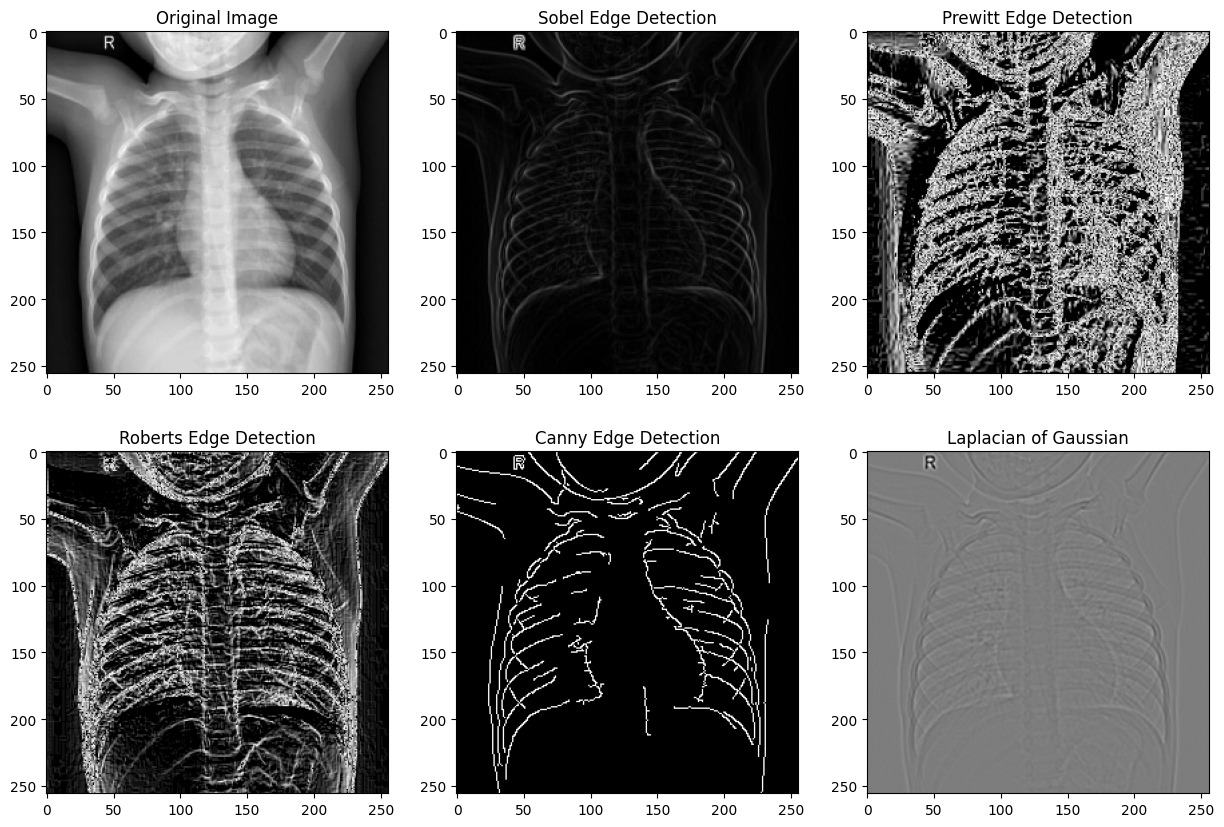

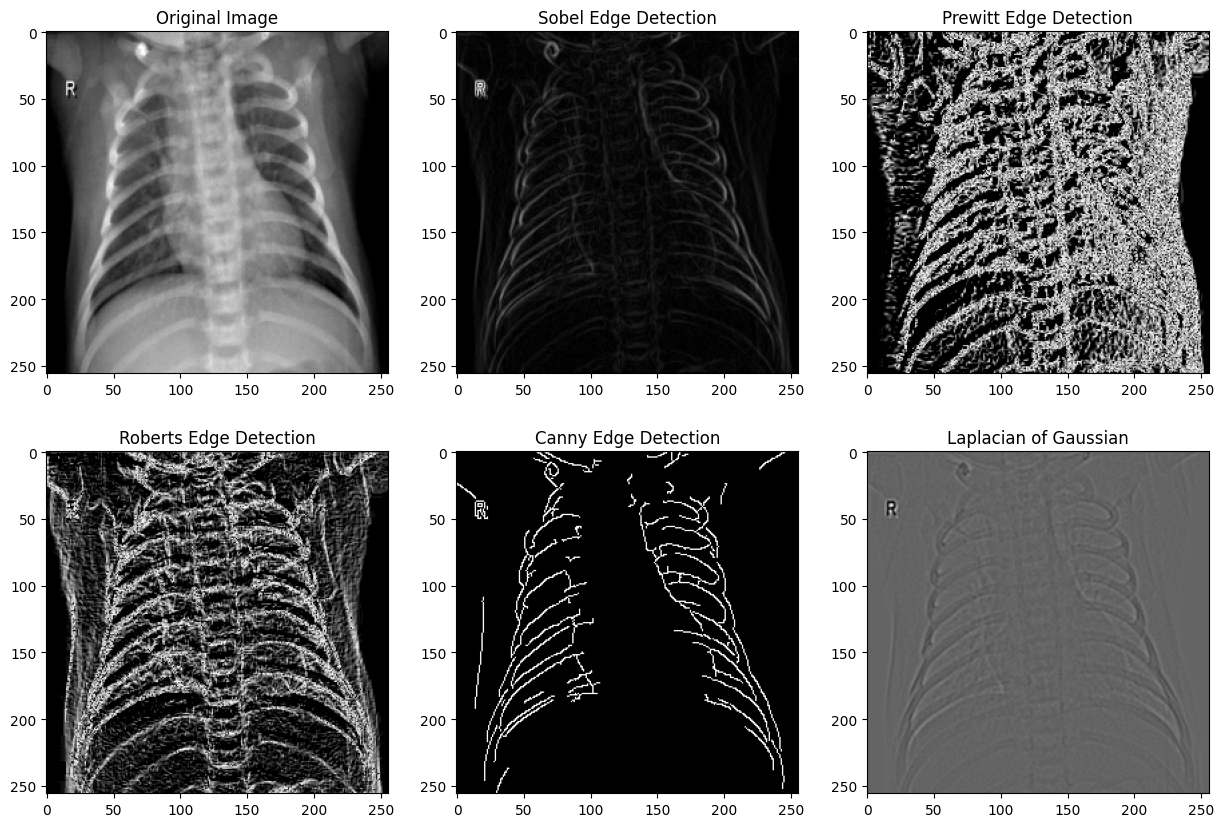

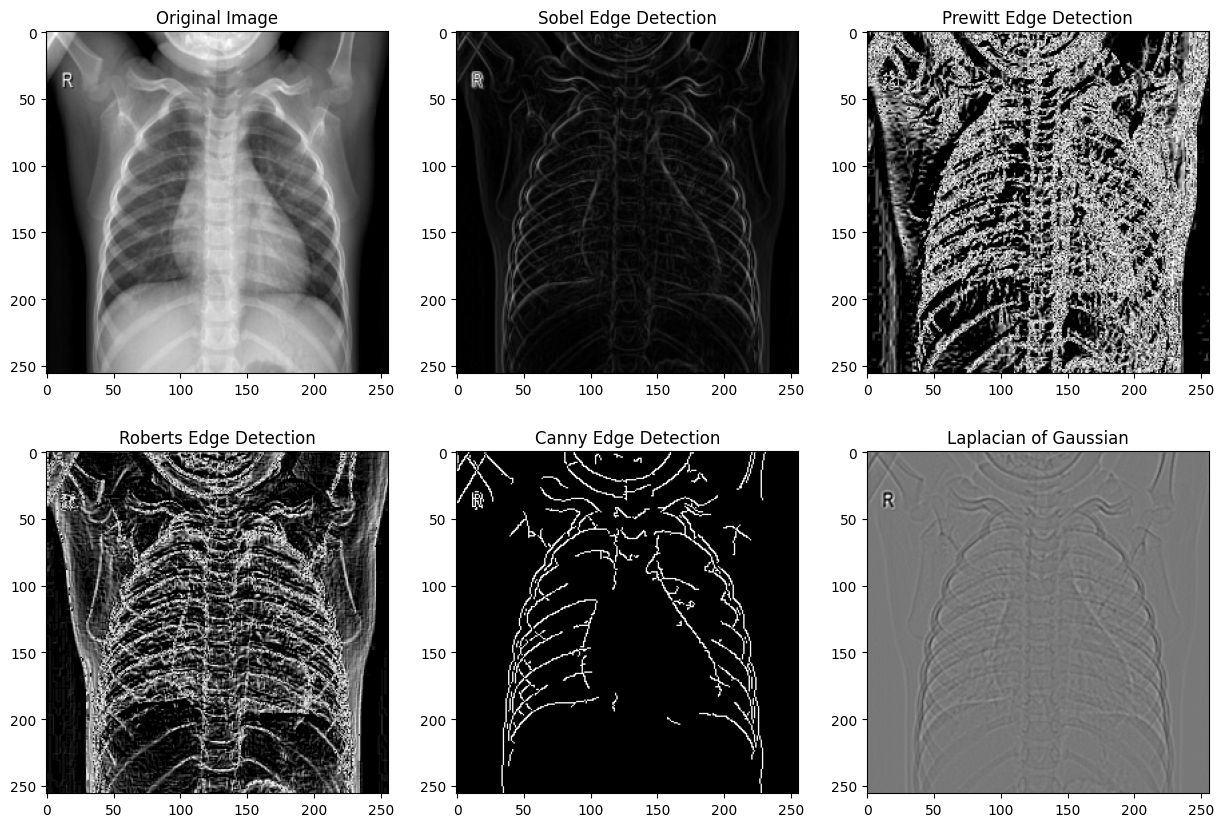

In [28]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the dataset
dataset_path = '/content/drive/MyDrive/DEPI/ChestXRays'

# Load images manually from the specified directory
def load_images_from_directory(directory, target_size=(256, 256)):
    """
    Load images from a directory and resize them to the target size.

    Args:
        directory (str): Path to the directory containing images.
        target_size (tuple): Size to which images will be resized.

    Returns:
        list: List of loaded and resized images.
    """
    images = []
    for filename in os.listdir(directory):
        img_path = os.path.join(directory, filename)
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img_resized = cv2.resize(img, target_size)
                images.append(img_resized)
        except Exception as e:
            print(f"Error loading image {filename}: {e}")

    return images

# Load images from the dataset directory
images = load_images_from_directory(dataset_path)
print(f"Loaded {len(images)} images.")

# Define edge detection functions
def sobel_operator(image):
    """
    Apply Sobel edge detection to an image.

    Args:
        image (np.array): Grayscale image array.

    Returns:
        np.array: Image with Sobel edges detected.
    """
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    return np.sqrt(np.square(sobelx) + np.square(sobely))

def prewitt_operator(image):
    """
    Apply Prewitt edge detection to an image.

    Args:
        image (np.array): Grayscale image array.

    Returns:
        np.array: Image with Prewitt edges detected.
    """
    kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=np.float32)
    kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=np.float32)
    prewittx = cv2.filter2D(image, -1, kernelx)
    prewitty = cv2.filter2D(image, -1, kernely)
    return np.sqrt(np.square(prewittx) + np.square(prewitty))

def roberts_operator(image):
    """
    Apply Roberts edge detection to an image.

    Args:
        image (np.array): Grayscale image array.

    Returns:
        np.array: Image with Roberts edges detected.
    """
    kernelx = np.array([[1, 0], [0, -1]], dtype=np.float32)
    kernely = np.array([[0, 1], [-1, 0]], dtype=np.float32)
    robertsx = cv2.filter2D(image, -1, kernelx)
    robertsy = cv2.filter2D(image, -1, kernely)
    return np.sqrt(np.square(robertsx) + np.square(robertsy))

def canny_edge_detector(image):
    """
    Apply Canny edge detection to an image.

    Args:
        image (np.array): Grayscale image array.

    Returns:
        np.array: Image with Canny edges detected.
    """
    return cv2.Canny(image, 100, 200)

def laplacian_of_gaussian(image):
    """
    Apply Laplacian of Gaussian edge detection to an image.

    Args:
        image (np.array): Grayscale image array.

    Returns:
        np.array: Image with Laplacian of Gaussian edges detected.
    """
    blurred_image = cv2.GaussianBlur(image, (3, 3), 0)
    return cv2.Laplacian(blurred_image, cv2.CV_64F)

# Process and display 3 images with edge detection
num_images_to_process = 3

for i in range(min(num_images_to_process, len(images))):
    image = images[i]

    # Apply edge detection methods
    sobel_edges = sobel_operator(image)
    prewitt_edges = prewitt_operator(image)
    roberts_edges = roberts_operator(image)
    canny_edges = canny_edge_detector(image)
    log_edges = laplacian_of_gaussian(image)

    # Display results
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(2, 3, 2)
    plt.imshow(sobel_edges, cmap='gray')
    plt.title('Sobel Edge Detection')

    plt.subplot(2, 3, 3)
    plt.imshow(prewitt_edges, cmap='gray')
    plt.title('Prewitt Edge Detection')

    plt.subplot(2, 3, 4)
    plt.imshow(roberts_edges, cmap='gray')
    plt.title('Roberts Edge Detection')

    plt.subplot(2, 3, 5)
    plt.imshow(canny_edges, cmap='gray')
    plt.title('Canny Edge Detection')

    plt.subplot(2, 3, 6)
    plt.imshow(log_edges, cmap='gray')
    plt.title('Laplacian of Gaussian')

    plt.show()
